In [2]:
import sys,os
import numpy as np
sys.path.append(os.path.abspath("./tp_2"))

In [3]:
import pathlib
from astropy.io import fits
import seaborn as sns
from spectral_analyzer import Spectrum
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
path_esperctros = pathlib.Path(os.path.abspath("./espectros/"))
lista_espectros = ["legac_M4_105701_v3.0.fits"]

In [5]:
sp1 = fits.open(path_esperctros/lista_espectros[0])
np.array(sp1[1].data[0]['WAVE']).shape

(6166,)

In [6]:
def load_spectra(sp_name:str):
    sp1 = fits.open(path_esperctros/sp_name)
    sp1 = fits.open(path_esperctros/lista_espectros[0])
    return Spectrum(wave=sp1[1].data[0]['WAVE'], flux=sp1[1].data[0]['FLUX'])

In [7]:
spec1 = load_spectra(lista_espectros[0])

<Axes: xlabel='Wavelength $(\\AA)$', ylabel='Intensity $\\frac{\\mathrm{erg}}{\\mathrm{cm}^{2} \\, \\mathrm{s} \\, \\AA}$'>

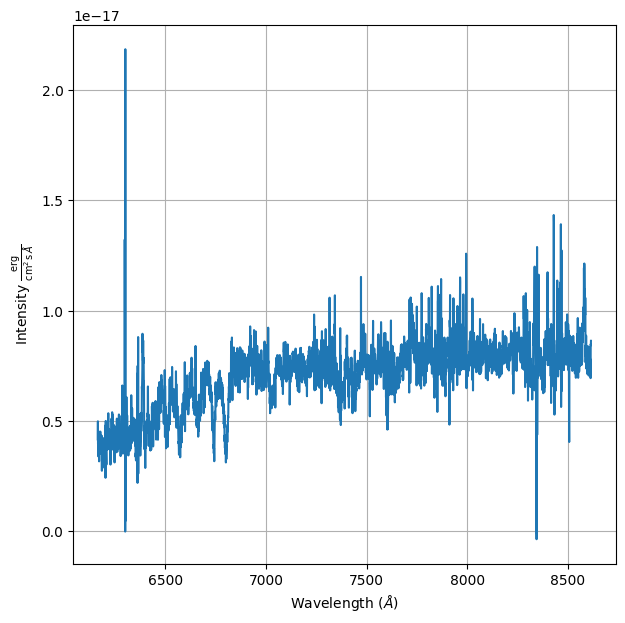

In [8]:
spec1.plot

In [9]:
spec2 = spec1.transform_to_restframe(redshift=0.6602)

<Axes: xlabel='Wavelength $(\\AA)$', ylabel='Intensity $\\frac{\\mathrm{erg}}{\\mathrm{cm}^{2} \\, \\mathrm{s} \\, \\AA}$'>

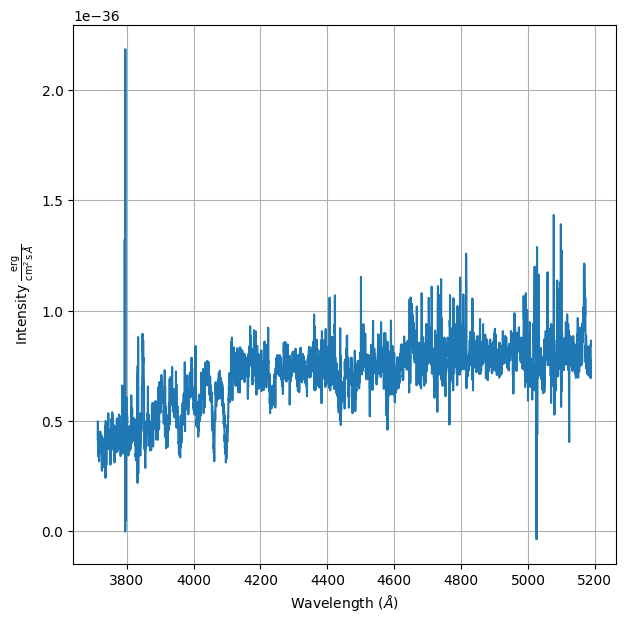

In [10]:
spec2.plot

In [11]:
path_legac=path_esperctros.parent / "legac.dat"
path_agns = path_esperctros.parent / "legac_agns.dat"
all_head=['ID_LEGAC','ID','RA2','DEC2','zspec', 
        'sigma','e_sigma','HDA','HB','MGB','FE5270',
         'FE5335','D4000','FHB','FOIII5007','n','nser_err','logMvir']

In [103]:
df = pd.read_csv(path_legac, delim_whitespace=True)
df.columns = all_head

dfagn = pd.read_csv(path_agns, delim_whitespace=True)
dfagn.columns = all_head


/tmp/ipykernel_83346/1778366165.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path_legac, delim_whitespace=True)
/tmp/ipykernel_83346/1778366165.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dfagn = pd.read_csv(path_agns, delim_whitespace=True)


In [53]:
df.dropna(inplace=True)

<Axes: xlabel='n', ylabel='Count'>

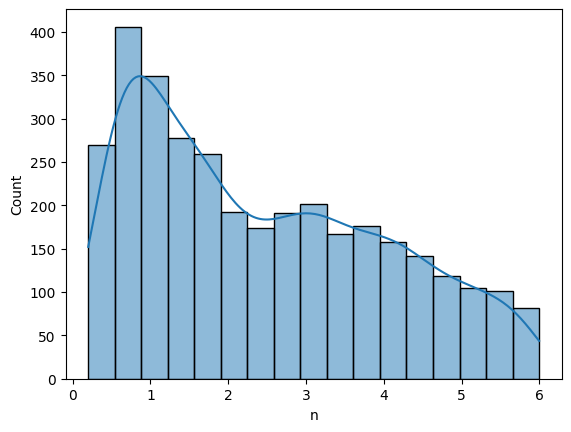

In [54]:
sns.histplot(df.n[(df.n<6)&(df.n>0)], kde=True)

(-1.0, 7.0)

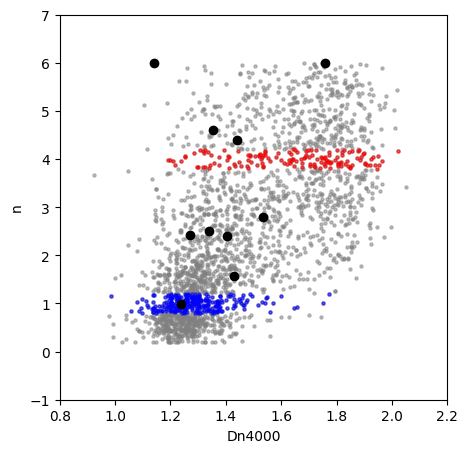

In [104]:
df2 = df[df.n<6]
fig,ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(df2.D4000, df2.n, alpha=0.5, s=5, c="gray")
ax.scatter(df2[(df2.n<1.2)&(df2.n>0.8)].D4000, df2[(df2.n<1.2)&(df2.n>0.8)].n, c="blue", s=5, alpha=0.5)
ax.scatter(df2[(df2.n<4.2)&(df2.n>3.8)].D4000, df2[(df2.n<4.2)&(df2.n>3.8)].n, c="red", s=5, alpha=0.5)
ax.scatter(dfagn.D4000, dfagn.n, c='k')
ax.set_xlabel("Dn4000")
ax.set_ylabel("n")
plt.xlim(0.8,2.2)
plt.ylim(-1, 7)

In [96]:
upper = [-0.288244, 9.71731, -109.333, 410.24]
lower = [-0.246416, 8.32651, -93.8249, 352.066] 

def _demarcation1(x, coefs):
    f = np.poly1d(coefs)
    return f(x)

def _demarcation0(x):
    return 0.375/(x - 10.5) + 1.14

def demarcation_upper(x):
    a = _demarcation0(x=x[np.where(x<=10)[0]])
    b = _demarcation1(x=x[np.where(x>10)[0]],coefs=upper)
    return np.concatenate((a,b))

def demarcation_lower(x):
    a = _demarcation0(x=x[np.where(x<=9.6)[0]])
    b = _demarcation1(x=x[np.where(x>9.6)[0]],coefs=lower)
    return np.concatenate((a,b))

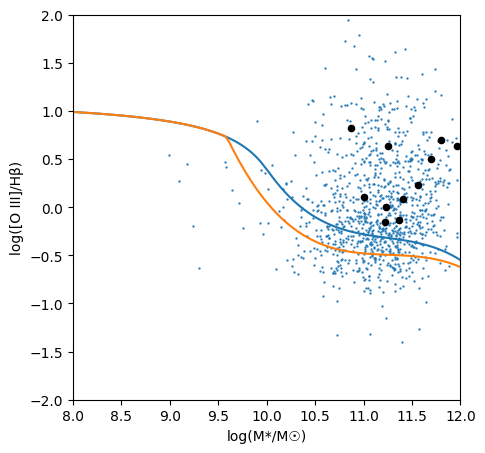

In [112]:
# x_vals = np.linspace(9.0, 11.5, 200)
# y_sep = 0.375 / (x_vals - 10.5) + 1.14
x = np.linspace(8, 12.0, 100)
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(df[df.FOIII5007 !=-99.0000].logMvir, np.log10(df[df.FOIII5007 !=-99.0000].FOIII5007/df[df.FOIII5007 !=-99.0000].FHB), s=0.5, alpha=0.9)
ax.set_xlim(8, 12)
ax.set_ylim(-2, 2)
ax.set_xlabel('log(M*/M☉)')
ax.set_ylabel('log([O III]/Hβ)')
ax.scatter(dfagn.logMvir, np.log10(dfagn.FOIII5007/dfagn.FHB), c='k', s=20)
ax.plot(x, demarcation_upper(x=x))
ax.plot(x, demarcation_lower(x=x))



In [116]:
df3 = df[(df.FOIII5007/df.FHB < 2)&(df.FOIII5007/df.FHB > -2) &(df.logMvir>8)&(df.logMvir<12)]

Text(0, 0.5, 'log([O III]/Hβ)')

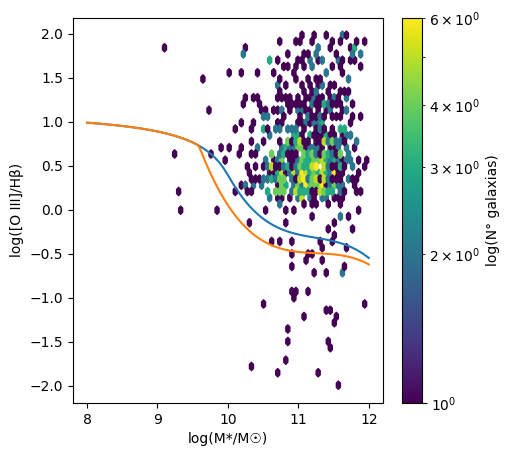

In [122]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.hexbin(df3[df3.FOIII5007 !=-99.0000].logMvir, df3[df3.FOIII5007 !=-99.0000].FOIII5007/df3[df3.FOIII5007 !=-99.0000].FHB, gridsize=50, cmap='viridis', bins='log')
plt.colorbar(label='log(N° galaxias)')
# y_sep = 0.375 / (x_vals - 10.5) + 1.14
x = np.linspace(8, 12.0, 100)
ax.plot(x, demarcation_upper(x=x))
ax.plot(x, demarcation_lower(x=x))
ax.set_xlabel('log(M*/M☉)')
ax.set_ylabel('log([O III]/Hβ)')

# Diagrama Dn4000 vs HDA

/tmp/ipykernel_83346/1971594401.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.scatter(df[(df.D4000 < 1.3)&(df.HDA>6)][mask1].D4000, df[(df.D4000 < 1.3)&(df.HDA>6)][mask1].HDA, s=0.5, c="red")
/tmp/ipykernel_83346/1971594401.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.scatter(df[(df.D4000 < 1.3)&(df.HDA>6)][mask1].D4000, df[(df.D4000 < 1.3)&(df.HDA>6)][mask1].HDA, s=0.5, c="red")
/tmp/ipykernel_83346/1971594401.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.scatter(df[(df.D4000 > 1.7)&(df.HDA<0.1)][mask1].D4000, df[(df.D4000 > 1.7)&(df.HDA<0.1)][mask1].HDA, s=0.5, c="blue")
/tmp/ipykernel_83346/1971594401.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.scatter(df[(df.D4000 > 1.7)&(df.HDA<0.1)][mask1].D4000, df[(df.D4000 > 1.7)&(df.HDA<0.1)][mask1].HDA, s=0.5, c="blue")


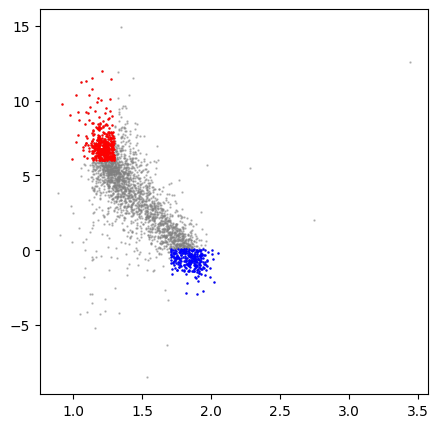

In [133]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
mask1 = (df.D4000 !=-99.0000)&(df.HDA !=-99.0000)
ax.scatter(df[mask1].D4000, df[mask1].HDA, s=0.5, c="gray", alpha=0.5)
ax.scatter(df[(df.D4000 < 1.3)&(df.HDA>6)][mask1].D4000, df[(df.D4000 < 1.3)&(df.HDA>6)][mask1].HDA, s=0.5, c="red")
ax.scatter(df[(df.D4000 > 1.7)&(df.HDA<0.1)][mask1].D4000, df[(df.D4000 > 1.7)&(df.HDA<0.1)][mask1].HDA, s=0.5, c="blue")

<Axes: xlabel='D4000', ylabel='HDA'>

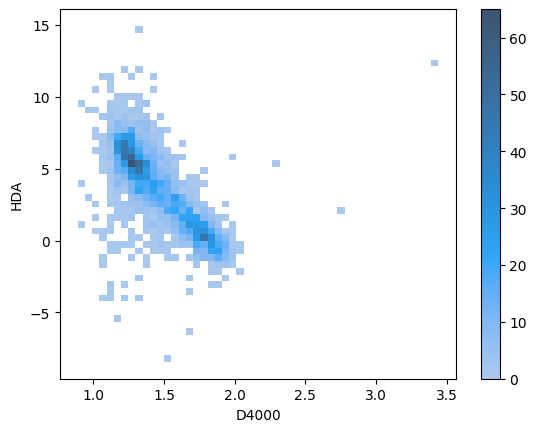

In [140]:
sns.histplot(data=df[mask1], x='D4000', y='HDA', bins=50, pmax=1.0, cbar=True)

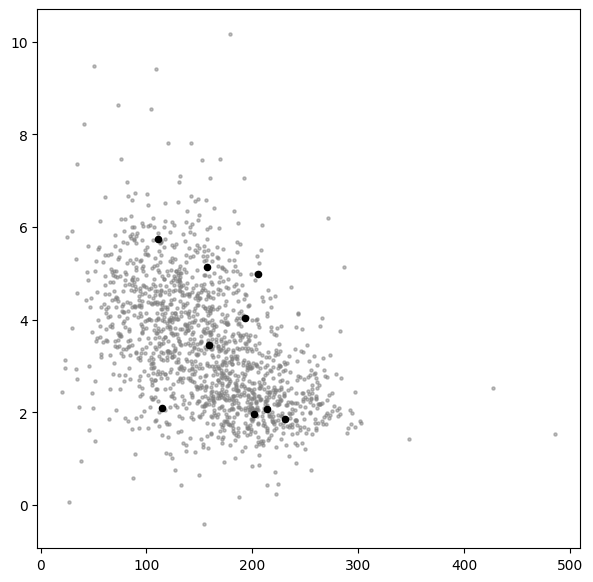

In [147]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
mask2 = (df.sigma!=-99.0000)&(df.HB!=-99.0000)
mask2_agn = (dfagn.sigma!=-99.0000)&(dfagn.HB!=-99.0000)
ax.scatter(df[mask2].sigma, df[mask2].HB, s=5, alpha=0.5, c="gray")
ax.scatter(dfagn[mask2_agn].sigma, dfagn[mask2_agn].HB, c='k', s=20)

<Axes: xlabel='sigma', ylabel='HB'>

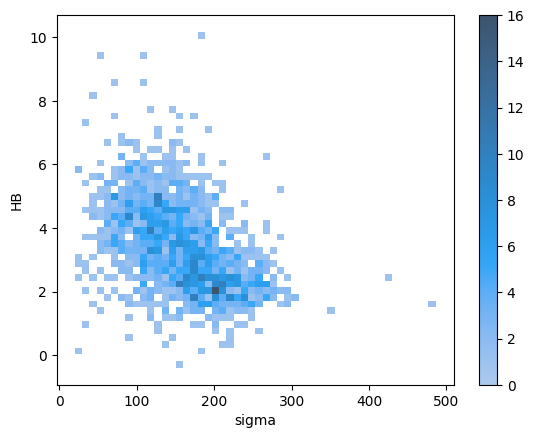

In [144]:
sns.histplot(data=df[mask2], x='sigma', y='HB', bins=50, pmax=1.0, cbar=True)

In [148]:
list(df)

['ID_LEGAC',
 'ID',
 'RA2',
 'DEC2',
 'zspec',
 'sigma',
 'e_sigma',
 'HDA',
 'HB',
 'MGB',
 'FE5270',
 'FE5335',
 'D4000',
 'FHB',
 'FOIII5007',
 'n',
 'nser_err',
 'logMvir']

In [149]:
df["MgFe"] = np.sqrt(df.MGB*(0.72*df.FE5270 + 0.28*df.FE5335))

/home/jorgefederico/astrofisica_general/tp_env/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


/tmp/ipykernel_83346/3043297130.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.scatter(df[df.D4000>1.6][mask_fehb].MgFe, df[df.D4000>1.6][mask_fehb].HB, c="red")
/tmp/ipykernel_83346/3043297130.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.scatter(df[df.D4000>1.6][mask_fehb].MgFe, df[df.D4000>1.6][mask_fehb].HB, c="red")
/tmp/ipykernel_83346/3043297130.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.scatter(df[df.D4000<1.4][mask_fehb].MgFe, df[df.D4000<1.4][mask_fehb].HB, c="blue")
/tmp/ipykernel_83346/3043297130.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax.scatter(df[df.D4000<1.4][mask_fehb].MgFe, df[df.D4000<1.4][mask_fehb].HB, c="blue")


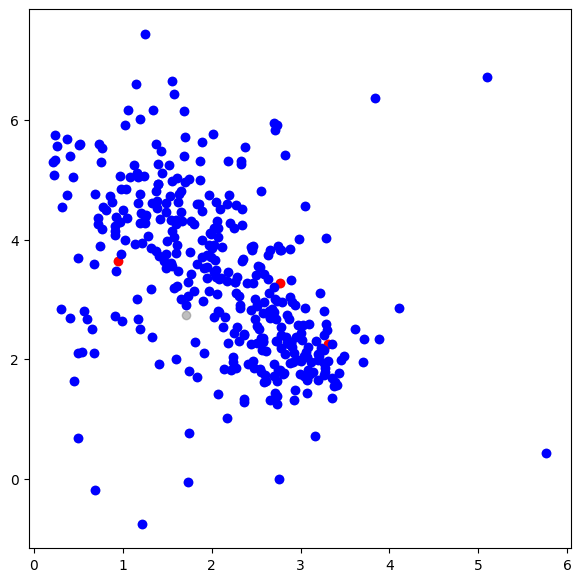

In [157]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
mask_fehb = (df.MgFe!=-99.0000)&(df.HB!=-99.0000)&(df.MgFe!=99.0000)&(df.MgFe < 6)
ax.scatter(df[mask_fehb].MgFe, df[mask_fehb].HB, c="gray", alpha=0.5)
ax.scatter(df[df.D4000>1.6][mask_fehb].MgFe, df[df.D4000>1.6][mask_fehb].HB, c="red")
ax.scatter(df[df.D4000<1.4][mask_fehb].MgFe, df[df.D4000<1.4][mask_fehb].HB, c="blue")

In [152]:
df[mask_fehb].MgFe

3        2.071809
6             NaN
25      99.000000
28      99.000000
41      99.000000
          ...    
4061    99.000000
4067    99.000000
4069     2.756273
4074     2.740219
4075     2.438413
Name: MgFe, Length: 1579, dtype: float64